<span style="color: orange">DRAFT: WILL BE FINALIZED BY FRIDAY. PROBABLY ONLY SMALL CHANGES IF ANY.</span>

## EE 502 P: Analytical Methods for Electrical Engineering
    
# Homework 6: Fourier Analysis
## Due 13 November, 2019 at 6:00 PM
### <span style="color: red">YOUR NAME HERE</span>

Copyright &copy; 2019, University of Washington

<hr>

**Instructions**: Use this notebook as a template. Answer all questions using well formatted Markdown with embedded LaTeX equations, executable Jupyter cells, or both. Submit your homework solutions as an `.ipynb` file via Canvas.

<span style="background: yellow; padding: 6px; border: 1pt solid black">
Although you may discuss the homework with others, you must turn in your own, original work.
</span>

**Things to remember:**
- Use complete sentences. Equations should appear in text as grammatical elements.
- Comment your code.
- Label your axes. Title your plots. Use legends where appropriate. 
- Before submitting a notebook, choose Kernel -> Restart and Run All to make sure your notebook runs when the cells are evaluated in order. 

Note : Late homework will be accepted up to one week after the due date and will be worth 50% of its full credit score. 

### 0. Warmup (Do not turn in)

- Make sure you get download, read, and run the notebook for lecture 4. Work through the notebook cell by cell and see what happens when you change the expressions, and make up some of your own.
- The material covered in class is intended to be an introductory overview of the incredibly rich and expansive subject of Fourier Analysis. 
- If you would like more resources, the following book is a good place to start. It is actually the notes used to teach intro signal processing at Stanford. Most of the material I covered in class is in these notes, plu a whole lot more.
> Osgood, [Lecture notes for EE 261](
https://see.stanford.edu/materials/lsoftaee261/book-fall-07.pdf).
- A more advanced and concise treatment of the subject is in the following book.
> Stein and Shakarchi, [Fourier Analysis: An Introduction](https://www.amazon.com/Fourier-Analysis-Introduction-Princeton-Lectures/dp/069111384X/ref=sr_1_1?keywords=stein+and+shakarchi+fourier&qid=1572974320&sr=8-1).

In [68]:
import cmath
import numpy as np
import scipy # Has linear algebra

import sympy as sm
sm.init_printing(use_latex='mathjax')

import matplotlib.pyplot as plt

### 1. Exponential form of Complex Numbers

Express each of the following complex numbers in the form $r e^{i\theta}$. Do this by hand (or in Latex) and check your work with Python.

$$0$$
$$1$$
$$-1$$
$$i$$
$$1-2i$$
$$-8+7i$$

We can write out the complex numbers in polar form from the Cartesian form $z = x + iy$ as:

$$\begin{align}
r e^{i\theta} &= r \angle{\theta} \\
&= \sqrt{x^2+y^2} \angle{\text{atan2}(x,y)}.
\end{align}$$

https://docs.python.org/2/library/cmath.html

In [69]:
nums = [0, 1j, sm.I/2]

for i in nums:
    print('Mag:', abs(i), 'Phase:', cmath.phase(i)*(180/np.pi)) # np.angle()

Mag: 0 Phase: 0.0
Mag: 1.0 Phase: 90.0
Mag: 1/2 Phase: 90.0


### 2. A Trigonometric Identity

The goal of this exercise is to find formulas for $\cos(\alpha+\beta)$ and $\sin(\alpha + \beta)$. in terms of $\sin\alpha$, $\sin\beta$, $\cos\alpha$, and $\cos\beta$.

a) First, express $e^{(\alpha+\beta)i}$ directly in terms of the $\sin$ and $\cos$ using Euler's formula.

b) Next, express $e^{(\alpha+\beta)i}$ as a product of two exponentials. Then convert each term in the product into $\sin$ and $\cos$ using Euler's formula. Expand the expression and group the terms in the real part and the imaginary part.

c) Equate the real parts and imaginary parts from (a) and (b).

2.a) 

We begin with the complex exponential:

$$
e^{(\alpha +\beta)i} = \cos{(\alpha +\beta)} + i \sin{(\alpha +\beta)} .
$$

2.b)

Next, the product of complex exponentials gives us:
$$
e^{\alpha i}e^{\beta i}  = (\cos{(\alpha)} + i \sin{(\alpha)})(\cos{(\beta)} + i \sin{(\beta)})
$$

$$
e^{\alpha i}e^{\beta i}  = \cos{(\alpha)}\cos{(\beta)} + i \cos{(\alpha)}\sin{(\beta)}  + i \sin{(\alpha)}\cos{(\beta)} + i^2 \sin{(\beta)} \sin{(\alpha)}
$$

2.c)

Equating the coefficients of the real and imaginary parts of the two equations will give us the identities.


### 3. Fourier Series Approximation

Similar to the example of the square wave done in class, find a Fourier Series approximation to the function

$$
f(t) = \left |cos(2\pi t) \right|
$$

which is a *rectified cosine*. Make sure you get the period of this function correct. Make a plot with three subplots for $N=5$, $N=10$, and $N=20$ showing better and better approximations.

Plug in some values of $t$ to find the period:



In [60]:
'''This is an example'''


# Note that the magnitude of the coefficients decreases like 1/n, showing that
# higher and higher frequencies contribute less and less to the overall shape.

t = sm.symbols("t", real=True)
n = sm.symbols("n", integer=True, positive=True)

f = 1 # function of interest
T = sm.Rational(1,2) # half period 
period = 2*T
q = -sm.pi*sm.I*n*t / T # arguments of the exponential in the cn equation

# Formula for the complex coefficients
cn = (1 / (period))*sm.integrate(f*sm.exp(q), (t,0,T)) + (1 / (period))*sm.integrate(-f*sm.exp(q), (t,-T,0))
cn # Complex coefficients

   ⅈ⋅π⋅n            -ⅈ⋅π⋅n
ⅈ⋅ℯ         ⅈ    ⅈ⋅ℯ      
──────── - ─── + ─────────
 2⋅π⋅n     π⋅n     2⋅π⋅n  

In [65]:
# Here are some of the terms of the Fourier Series

vals = range(-10,10)
terms = [cn.subs(n,k)*sm.exp(sm.pi*sm.I*k*t/ T) for k in vals]
terms = [i for i in terms if i != sm.nan]

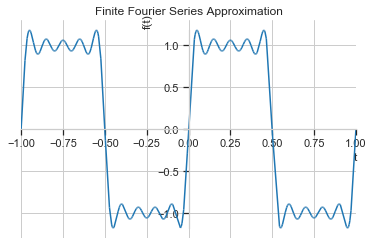

0

In [66]:
# Plot the sum of all the terms versus theta
fapprox = sm.re(sum(terms))
sm.plot(fapprox,(t,-1,1),title=r"Finite Fourier Series Approximation")
plt.show()
fapprox.subs(t,1)

### 4. Orthogonality

Show that $\cos(2\pi t)$ and $\sin(2 \pi t)$ are orthogonal by showing that their inner product (a.k.a. dot product) is zero. Hint: Express the two functions in exponential form, and expand their product inside the integral.

4)

Recall that for $f,g,h \in L^2[0,1]$, the **inner product** is defined by:

$$
(f,g) = \int_0^1 f(t)\overline{g(t)} dt.
$$

Let's set $f(t) = \cos{(2\pi t)}$ and $g(t) = \overline{g(t)} = \sin{(2\pi t)}$ (because it's a real valued function) and take their inner product:


### 5. Fourier Transforms

Find the Fourier Transforms of the following functions. You can use `sympy`. Make sure to simplify, these shouldn't give complicated results. Plot original functions and their transforms in a nice 3 $\times$ 2 grid of plots. Label the sub plots.

$$
f(t) = \left \{ 
\begin{array}{l}
1 \;\mathrm{if} \;t \geq 0 \\
0 \;\mathrm{else}
\end{array}
\right .
$$

$$
f(t) = \frac{1}{1+t^2}
$$

$$
f(t) = e^{-\pi t^2}
$$

5.a)

We begin with the definition of the FT applied to the function:

$$
F(s) = \int_{-\infty}^{\infty}f(t) e^{-2\pi i s t}dt 
$$

$$
F(s) = \int_{-\infty}^{0}(0) e^{-2\pi i s t}dt  + \int_{0}^{\infty}(1) e^{-2\pi i s t}dt 
$$

Note that on a symmetric finite interval, this would be the $sinc$ function instead.

In [41]:
# 5.a) An example of how to check

t, s = sm.var("t s")
a = sm.oo
ft_a = t #Change this
Ff_a = sm.integrate(sm.exp(-2*sm.pi*sm.I*s*t)*ft_a, (t,0, a))
Ff_a.simplify()

⎧       -1               │         π│   π
⎪     ───────        for │arg(s) + ─│ < ─
⎪        2  2            │         2│   2
⎪     4⋅π ⋅s                             
⎪                                        
⎨∞                                       
⎪⌠                                       
⎪⎮    -2⋅ⅈ⋅π⋅s⋅t                         
⎪⎮ t⋅ℯ           dt       otherwise      
⎪⌡                                       
⎩0                                       

5.b)

Begin with the transform pair off of a standard FT transform table:

$$\mathcal{F}\{e^{-\alpha |t|}\} = \frac{2\alpha}{\alpha^2 + 4\pi^2 f^2}.$$

Set $\alpha=2\pi$.

 See the following for a different approach:

http://mathworld.wolfram.com/FourierTransformExponentialFunction.html

5.c)

We begin with the definition of the FT applied to the function:

$$
F(s) = \int_{-\infty}^{\infty}e^{-\pi t^2} e^{-2\pi i s t}dt \\
= \int_{-\infty}^{\infty} e^{-\pi(t^2 + 2i s t)}dt.
$$

Now we need to complete the square. This is given by the formula:

$$ax^2 + bx + c = 0 \implies a(x + \frac{b}{2a})^2 + (c-\frac{b^2}{4a})$$


Good tutorial on sharing axes:

https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/subplots_demo.html

In [27]:
s = np.linspace(-2,2,1000)
t = s

# The f(t) functions
fta = lambda t: np.where(t>=0, 1, 0)
ftb =   
ftc = 

# The Fourier Transforms
FTa = abs(1 / (2*np.pi*sm.I*s)) # Can't plot Argand Diagram along with these so let's just do magnitude 
FTb = 
FTc = 

# Begin plotting
fig,ax=plt.subplots(3,2,sharex=True,figsize=(15,7))

ax[0,0].plot(t, fta(t)); ax[0,0].set_ylabel(r"$f(t) =$ step$(t)$")
ax[0,1].plot(s, FTa); ax[0,1].set_ylabel(r"$|F(s)|$")

ax[1,0].plot(t, ftb ); ax[1,0].set_ylabel(r"$f(t)=\frac{1}{1+t^2}$")
ax[1,1].plot(s, FTb); ax[1,1].set_ylabel(r"$F(s)=\pi e^{-2\pi |s|}$")

ax[2,0].plot(t, ftc); ax[2,0].set_ylabel(r"$f(t)=e^{-\pi t^2}$"); ax[2,0].set_xlabel('t');
ax[2,1].plot(s, FTc); ax[2,1].set_ylabel(r"$F(s)=e^{-\pi s^2}$"); ax[2,1].set_xlabel('s');
plt.suptitle('Fourier Transform Pairs')
plt.show()

SyntaxError: invalid syntax (<ipython-input-27-654ac84b0a2e>, line 6)

### 6. Solve a system of ODEs

Similar to the ODE example in the notes, find a solution to the two differential equations

\begin{eqnarray}
\dot x & = & -y \\
\dot y & = & -x + u
\end{eqnarray}

a) First take the Fourier Transform of both equations. 

b) Solve for $Y(s)$ in terms of $U(s)$. 

c) Note that the solution for $Y(s)$ involves a function of $s$ times $U(s)$. Figure out the inverse Fourier Transform of that function. 

d) Use a convolution to figure out $y(t)$ in terms of $u(t)$. 

e) Find $X(s)$ in terms of $Y(s)$ and then $x(t)$ in terms of $y(t)$. 

6.a)

$$
\mathcal{F}\{\dot x\} = \mathcal{F}\{-y\} \\
\mathcal{F}\{\dot y\} = \mathcal{F}\{-x + u\}
$$

$$
2\pi i s X(s) = -Y(s) \\
2\pi i s Y(s) = -X(s) + U(s)\}
$$

In [36]:
t, s = sm.var("t s")
a = sm.oo
FT = #Enter the expression from part c here

f = sm.integrate(sm.exp(2*sm.pi*sm.I*s*t)*FT, (s,-a, a))
sm.simplify(f)

⎧            -t                       
⎪           ℯ                         
⎪           ───              for t > 0
⎪            2                        
⎪                                     
⎪∞                                    
⎪⌠                                    
⎨⎮            2⋅ⅈ⋅π⋅s⋅t               
⎪⎮  -2⋅ⅈ⋅π⋅s⋅ℯ                        
⎪⎮  ──────────────────── ds  otherwise
⎪⎮         2  2                       
⎪⎮      4⋅π ⋅s  + 1                   
⎪⌡                                    
⎪-∞                                   
⎩                                     

### 7. The DFT

a) Write a python function that takes an integer $N$ and returns a `sympy` matrix representing the DFT matrix $\mathbf{F}$ as defined in the notes. 

b) Define $\mathbf{U} = \frac{1}{\sqrt{N}}\mathbf{F}$. Find the eigenvalues of $\mathbf{U}$ for various values of $N$. What do you notice? Is there a pattern?

c) Make a random sequence of $20$ real numbers between 0 and 1. Find the DFT using your matrix and compare it to the DFT you get using `numpy`'s built in function. Hint: you should convert your $\mathbf{F}$ matrix into a `numpy` matrix first. Plot your sequence, the magnitude of the DFT and the angle of the DFT.

Recall: 

$$
\mathbf{F} = \begin{pmatrix}
\omega_n^{0\cdot 0} & \dots & \omega_n^{0\cdot (n-1)} \\
\vdots & & \vdots \\
\omega_n^{(n-1)\cdot 0} & \dots & \omega_n^{(n-1)\cdot (n-1)}
\end{pmatrix}
$$

And

$$
\mathbf{X} = \mathbf{F}\mathbf{x}
$$

In [ ]:
def DFT(N):
    '''
    Assumes N is a positive integer
    Returns F, the DFT matrix
    '''
    wn = sm.exp(-2*sm.pi*sm.I / N) #Make in sympy for part (b), but numpy for (c)
    F = #zeros, ones, emtpy, etc. something we can fill up
    #Make F sympy for part (b), but numpy for (c)
    for i in range(N): #rows
        for j in range(N): #cols
            F[i,j] = # the base to the ijth power
     
    return F

In [ ]:
# 7.b)
n = 4
U = (1 / sm.sqrt(n)) * myDFT(n)
# Use U.eigenvals()

In [65]:
scipy.linalg.dft(4) #also makes this. Possible to check ours with this

array([[ 1.0000000e+00+0.0000000e+00j,  1.0000000e+00+0.0000000e+00j,
         1.0000000e+00+0.0000000e+00j,  1.0000000e+00+0.0000000e+00j],
       [ 1.0000000e+00+0.0000000e+00j,  6.1232340e-17-1.0000000e+00j,
        -1.0000000e+00-1.2246468e-16j, -1.8369702e-16+1.0000000e+00j],
       [ 1.0000000e+00+0.0000000e+00j, -1.0000000e+00-1.2246468e-16j,
         1.0000000e+00+2.4492936e-16j, -1.0000000e+00-3.6739404e-16j],
       [ 1.0000000e+00+0.0000000e+00j, -1.8369702e-16+1.0000000e+00j,
        -1.0000000e+00-3.6739404e-16j,  5.5109106e-16-1.0000000e+00j]])

Paper on the interpretation:

http://users.metu.edu.tr/ccandan/pub_dir/Eig_Structure_DFT_IEEE_SPM_Column_March2011.pdf

### 8. Filtering

Repeat the example from the notes on filtering the sum of two sine waves, except do the sum of a sine wave plus zero centered Gaussian noise with variance 0.25. Note, to make a list of numbers random Gaussian numbers, use the function `np.random.normal`. In the notes, a cutoff of 10 was used. Tune this to try to recover the sine wave as best you can in the low pass filtered version.

Text(0.5,1,'Low pass filtered signal')

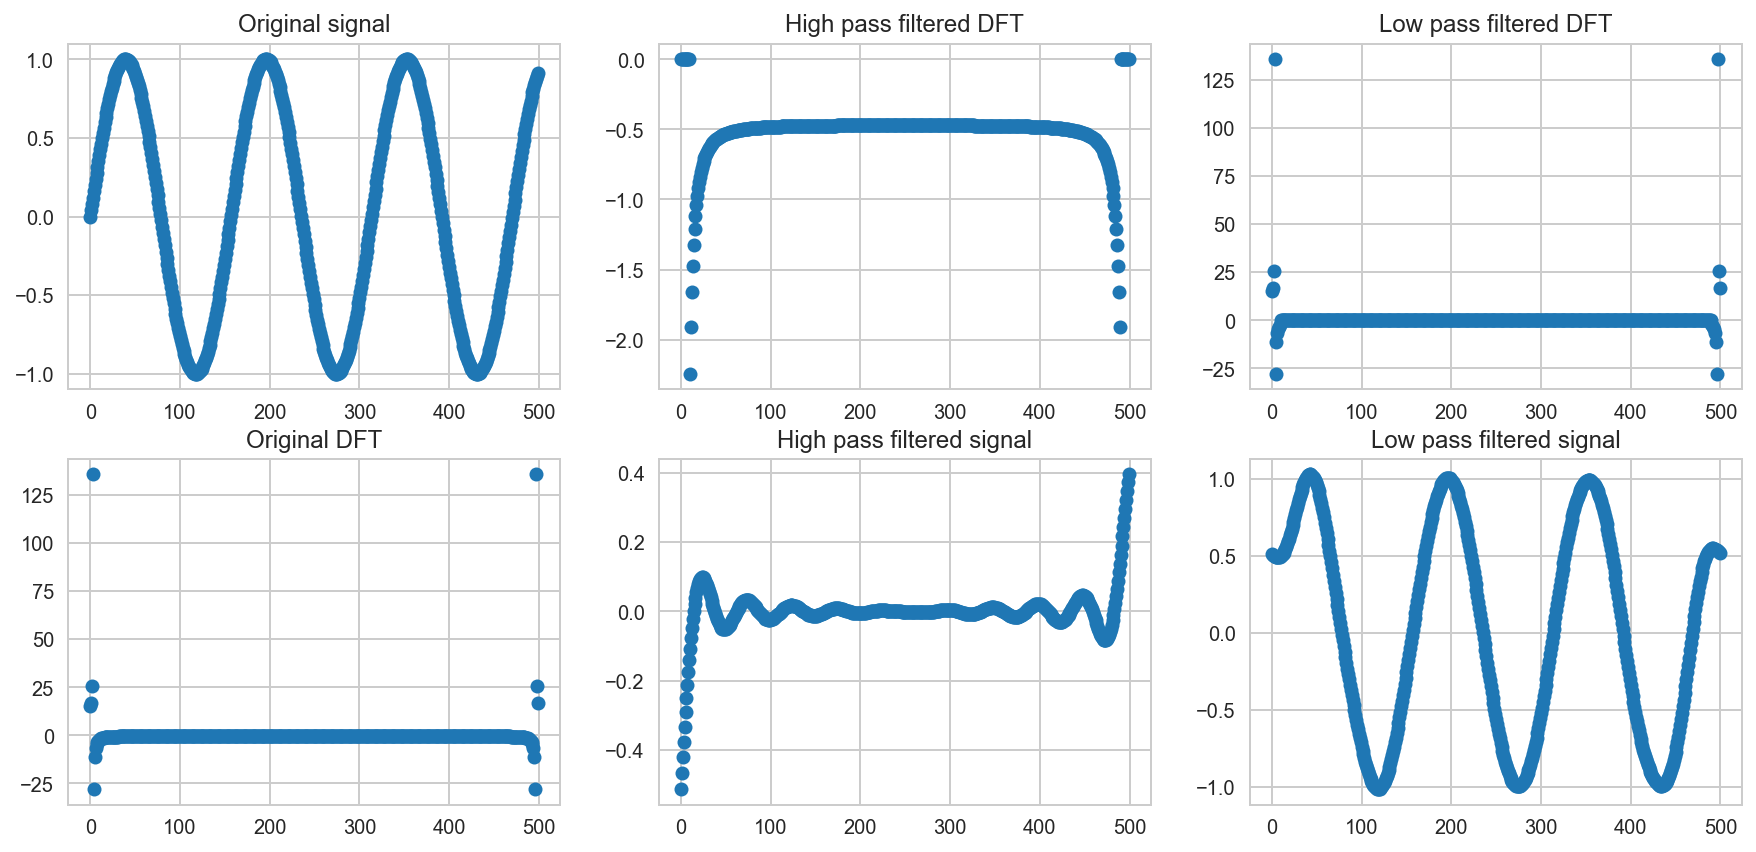

In [71]:
# Example: Filters (From class)

n = 500
#mu, sigma = 
x = np.sin(np.linspace(0,20,n)) # + np.random.normal()
X = np.fft.fft(x)

HPF = np.copy(X)
HPF[0:10] = 0 # remove low frequencies
HPF[-10:n] = 0
xhpf = np.real(np.fft.ifft(HPF))

LPF = np.copy(X)
LPF[10:n-10] = 0 # remove high frequencies
xlpf = np.real(np.fft.ifft(LPF))

fig,ax=plt.subplots(2,3,figsize=(15,7))

ax[0,0].plot(x,'o'); ax[0,0].set_title("Original signal")
ax[1,0].plot(np.real(X),'o'); ax[1,0].set_title("Original DFT")

ax[0,1].plot(np.real(HPF),'o'); ax[0,1].set_title("High pass filtered DFT")
ax[1,1].plot(xhpf,'o'); ax[1,1].set_title("High pass filtered signal")

ax[0,2].plot(np.real(LPF),'o'); ax[0,2].set_title("Low pass filtered DFT")
ax[1,2].plot(xlpf,'o'); ax[1,2].set_title("Low pass filtered signal")

### 9.  Image Processing

Find a nice gray scale image to load, or use the Minion image from class. Call the resulting matrix $m$.

a) Render the image using `matplotlib`. 

b) Take the DFT of the image $m$ to get a matrix $M$. Then make a new matrix $M_\mathrm{new}$ in which each entry is just the magnitude of the corresponding entry in $M$. Create a new image from the inverse Fourier transform of this image and render it. 

c) Do the same thing, except set the entries in $M_\mathrm{new}$ to the angle of the entries in $M$. Create a new image from the inverse Fourier transform of this image and render it.

d) Do the same thing, except normalize all the entries in $M_\mathrm{new}$ to have magnitude 1. Create a new image from the inverse Fourier transform of this image and render it.

What might you conclude about the information contained in the magnitude of the transformed image? What might you conclude about the information contained in the angle?

**Extra Credit:** Do this exercise with a color image instead of gray scale.

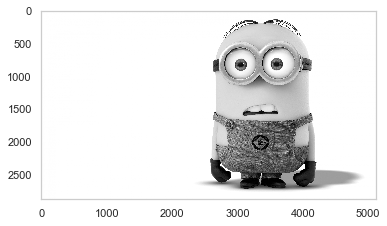

In [40]:
# 9.a) Render the image using matplotlib.

import imageio
    
m = imageio.imread('minion.jpg',as_gray=True)
plt.imshow(m, cmap = 'gray')
plt.grid(False)
plt.show()

https://imageio.readthedocs.io/en/stable/scipy.html

http://web.archive.org/web/20130513181427id_/http://sharp.bu.edu/~slehar/fourier/fourier.html#filtering

https://stackoverflow.com/questions/33610825/normalization-in-image-processing

https://www.wikiwand.com/en/Normalization_(image_processing)